In [1]:
import pandas as pd

In [2]:
#to load the data back in use
df_full = pd.read_pickle('2019original_turnstile_df.pkl')

In [3]:
df_full.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/31/2019,00:00:00,REGULAR,7183242,2433142
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/31/2019,04:00:00,REGULAR,7183258,2433149
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/31/2019,08:00:00,REGULAR,7183278,2433176
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/31/2019,12:00:00,REGULAR,7183393,2433262
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/31/2019,16:00:00,REGULAR,7183572,2433312


In [4]:
#create a new column with using the date & time columns,
# then turning it into a datetime object
df_full['DateTime'] = pd.to_datetime(df_full.DATE.astype(str) + " " + df_full.TIME.astype(str))

In [5]:
#remove whitespace from the column titles
df_full.columns = [column.strip() for column in df_full.columns]
df_full.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS', 'DateTime'],
      dtype='object')

In [6]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 615308 entries, 0 to 204927
Data columns (total 12 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   C/A       615308 non-null  object        
 1   UNIT      615308 non-null  object        
 2   SCP       615308 non-null  object        
 3   STATION   615308 non-null  object        
 4   LINENAME  615308 non-null  object        
 5   DIVISION  615308 non-null  object        
 6   DATE      615308 non-null  object        
 7   TIME      615308 non-null  object        
 8   DESC      615308 non-null  object        
 9   ENTRIES   615308 non-null  int64         
 10  EXITS     615308 non-null  int64         
 11  DateTime  615308 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 61.0+ MB


In [7]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', None)

In [8]:
#grouping by turnstiles locations and summing entries/exits by date
# note that SCP is the only location specific column that changes
turnstiles_df = df_full.groupby(['C/A', 'UNIT', 'STATION', 'SCP', 'DATE' ]).sum().reset_index()


In [9]:
turnstiles_df.head(1000)

,C/A,UNIT,STATION,SCP,DATE,ENTRIES,EXITS
0,A002,R051,59 ST,02-00-00,08/31/2019,43100585,14599389
1,A002,R051,59 ST,02-00-00,09/01/2019,43105116,14600615
2,A002,R051,59 ST,02-00-00,09/02/2019,43108835,14601646
3,A002,R051,59 ST,02-00-00,09/03/2019,43113279,14603174
4,A002,R051,59 ST,02-00-00,09/04/2019,43120999,14605789
5,A002,R051,59 ST,02-00-00,09/05/2019,43129001,14608932
6,A002,R051,59 ST,02-00-00,09/06/2019,43137197,14611829
7,A002,R051,59 ST,02-00-00,09/07/2019,43144417,14613913
8,A002,R051,59 ST,02-00-00,09/08/2019,43149462,14615103
9,A002,R051,59 ST,02-00-00,09/09/2019,43153947,14616883


In [10]:
#just choose one turnstile at a station
first_turnstile_df = turnstiles_df.loc[lambda turnstiles_df: turnstiles_df['STATION'] == '59 ST'].loc[lambda turnstiles_df: turnstiles_df['SCP'] == '02-00-00'].loc[lambda turnstiles_df: turnstiles_df['UNIT'] == 'R051'].loc[lambda turnstiles_df: turnstiles_df['C/A'] == 'A002']


In [11]:
first_turnstile_df

,C/A,UNIT,STATION,SCP,DATE,ENTRIES,EXITS
0,A002,R051,59 ST,02-00-00,08/31/2019,43100585,14599389
1,A002,R051,59 ST,02-00-00,09/01/2019,43105116,14600615
2,A002,R051,59 ST,02-00-00,09/02/2019,43108835,14601646
3,A002,R051,59 ST,02-00-00,09/03/2019,43113279,14603174
4,A002,R051,59 ST,02-00-00,09/04/2019,43120999,14605789
5,A002,R051,59 ST,02-00-00,09/05/2019,43129001,14608932
6,A002,R051,59 ST,02-00-00,09/06/2019,43137197,14611829
7,A002,R051,59 ST,02-00-00,09/07/2019,43144417,14613913
8,A002,R051,59 ST,02-00-00,09/08/2019,43149462,14615103
9,A002,R051,59 ST,02-00-00,09/09/2019,43153947,14616883


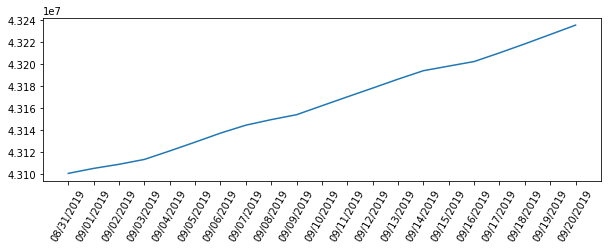

In [13]:
#plot the daily timeseries for a single turnstile

%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(10,3))
plt.xticks(rotation=60)
plt.plot(first_turnstile_df['DATE'],first_turnstile_df['ENTRIES'])

In [14]:
stations_grouped_df = turnstiles_df.reset_index().loc[lambda turnstiles_df: turnstiles_df['STATION'] == '59 ST'].loc[lambda turnstiles_df: turnstiles_df['UNIT'] == 'R051']
stations_grouped_df.shape

(546, 8)

In [15]:
test_df = turnstiles_df.reset_index().loc[lambda turnstiles_df: turnstiles_df['STATION'] == '59 ST']
test_df.shape

(1008, 8)

In [16]:
#check how many unique subway stations there are: 379
df_full['STATION'].nunique()

378

In [17]:
turnstiles_df.describe()

,ENTRIES,EXITS
count,1.025550e+05,1.025550e+05
mean,2.531469e+08,2.094883e+08
std,1.298305e+09,1.201894e+09
min,0.000000e+00,0.000000e+00
25%,1.656050e+06,7.375210e+05
50%,1.208101e+07,6.969101e+06
75%,3.966590e+07,2.715738e+07
max,2.011412e+10,2.663281e+10


In [18]:
type(df_full['DateTime'])

pandas.core.series.Series

In [19]:
df_full

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DateTime
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/31/2019,00:00:00,REGULAR,7183242,2433142,2019-08-31 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/31/2019,04:00:00,REGULAR,7183258,2433149,2019-08-31 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/31/2019,08:00:00,REGULAR,7183278,2433176,2019-08-31 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/31/2019,12:00:00,REGULAR,7183393,2433262,2019-08-31 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/31/2019,16:00:00,REGULAR,7183572,2433312,2019-08-31 16:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
204923,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/20/2019,05:00:00,REGULAR,5554,420,2019-09-20 05:00:00
204924,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/20/2019,09:00:00,REGULAR,5554,420,2019-09-20 09:00:00
204925,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/20/2019,13:00:00,REGULAR,5554,420,2019-09-20 13:00:00
204926,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/20/2019,17:00:00,REGULAR,5554,420,2019-09-20 17:00:00


In [20]:
#group stations and sum daily entries and exits
dates = df_full['DateTime'].dt.date
station_by_date = df_full.groupby(['STATION', dates]).sum()

station_by_date.head(100)

ENTRIES        EXITS
STATION       DateTime                            
1 AV          2019-08-31   8490618095   8793063865
              2019-09-01   8490646358   8793104278
              2019-09-02   8490670612   8793141416
              2019-09-03   8490715696   8793202392
              2019-09-04   8490811676   8793307248
              2019-09-05   8490916191   8793421454
              2019-09-06   8491030355   8793544993
              2019-09-07   8491123067   8793649186
              2019-09-08   8491162755   8793698883
              2019-09-09   8491218261   8793765883
              2019-09-10   8491326169   8793881693
              2019-09-11   8491438142   8794001695
              2019-09-12   8491551852   8794124612
              2019-09-13   8491667112   8794253031
              2019-09-14   8491750519   8794341062
              2019-09-15   8491750639   8794343106
              2019-09-16   8491783537   8794384591
              2019-09-17   8491890725   8794500531
              2019-09-18   8492003483   8794622264
              2019-09-19   8492116268   8794744501
              2019-09-20   8492230893   8794867180
103 ST        2019-08-31    859990954    705742151
              2019-09-01    860085514    705817669
              2019-09-02    860171096    705889128
              2019-09-03    860291268    705977834
              2019-09-04    860463257    706103329
              2019-09-05    860643585    706234414
              2019-09-06    860830560    706368619
              2019-09-07    908980269    763019683
              2019-09-08    861088186    706561333
              2019-09-09    861219689    706655782
              2019-09-10   2420550547   2529334625
              2019-09-11    861602410    706926082
              2019-09-12    861798830    707063326
              2019-09-13    861993394    707200108
              2019-09-14    862154178    707315917
              2019-09-15    862263236    707397041
              2019-09-16    862401051    707491598
              2019-09-17    862587204    707622857
              2019-09-18    862783064    707758506
              2019-09-19    862978764    707895590
              2019-09-20    863175628    708031666
103 ST-CORONA 2019-08-31    438965357    438639372
              2019-09-01    439041365    438706223
              2019-09-02    439109639    438762282
              2019-09-03    439202890    438823161
              2019-09-04    439323704    438913892
              2019-09-05    439446746    439005755
              2019-09-06    439571235    439099121
              2019-09-07    439675248    439187325
              2019-09-08    439755866    439257668
              2019-09-09    439857131    439322866
              2019-09-10    439984435    439415437
              2019-09-11    440113323    439509641
              2019-09-12    440243446    439605075
              2019-09-13    440371825    439699374
              2019-09-14    440479216    439791279
              2019-09-15    440559566    439861906
              2019-09-16    440662685    439928477
              2019-09-17    440789382    440021395
              2019-09-18    440917977    440115436
              2019-09-19    441047803    440208746
              2019-09-20    441177250    440304984
104 ST        2019-08-31  29093350268  21172779259
              2019-09-01  29093359085  21172781893
              2019-09-02  29093366918  21172784190
              2019-09-03  29093380314  21172787047
              2019-09-04  29093398666  21172792005
              2019-09-05  29093417411  21172797020
              2019-09-06  29087828739  21162987952
              2019-09-07  29093447006  21172806593
              2019-09-08  29093450508  21172808508
              2019-09-09  29093461407  21172810959
              2019-09-10  29093480437  21172815998
              2019-09-11  29093500139  21172820989
              2019-09-12  29093519146  21172826054
              2019-09-13  29093538181  21172831100
 

In [21]:
#stations grouped by date and time
station_df_datetime = df_full.groupby(['STATION', 'DateTime']).sum()

station_df_datetime.head(500)

ENTRIES       EXITS
STATION       DateTime                                   
1 AV          2019-08-31 00:00:00  1415101561  1465508502
              2019-08-31 04:00:00  1415101931  1465508896
              2019-08-31 08:00:00  1415102094  1465509366
              2019-08-31 12:00:00  1415102790  1465510479
              2019-08-31 16:00:00  1415104147  1465512338
              2019-08-31 20:00:00  1415105572  1465514284
              2019-09-01 00:00:00  1415106556  1465515614
              2019-09-01 04:00:00  1415106861  1465515918
              2019-09-01 08:00:00  1415106987  1465516296
              2019-09-01 12:00:00  1415107508  1465517183
              2019-09-01 16:00:00  1415108592  1465518774
              2019-09-01 20:00:00  1415109854  1465520493
              2019-09-02 00:00:00  1415110725  1465521540
              2019-09-02 04:00:00  1415111008  1465521856
              2019-09-02 08:00:00  1415111134  1465522429
              2019-09-02 12:00:00  1415111631  1465523508
              2019-09-02 16:00:00  1415112527  1465525217
              2019-09-02 20:00:00  1415113587  1465526866
              2019-09-03 00:00:00  1415114382  1465527865
              2019-09-03 04:00:00  1415114574  1465528014
              2019-09-03 08:00:00  1415115817  1465530536
              2019-09-03 12:00:00  1415119832  1465534724
              2019-09-03 16:00:00  1415122930  1465537957
              2019-09-03 20:00:00  1415128161  1465543296
              2019-09-04 00:00:00  1415130002  1465545046
              2019-09-04 04:00:00  1415130252  1465545246
              2019-09-04 08:00:00  1415131602  1465547964
              2019-09-04 12:00:00  1415135933  1465552140
              2019-09-04 16:00:00  1415139298  1465555568
              2019-09-04 20:00:00  1415144589  1465561284
              2019-09-05 00:00:00  1415146741  1465563140
              2019-09-05 04:00:00  1415147013  1465563275
              2019-09-05 08:00:00  1415148387  1465566493
              2019-09-05 12:00:00  1415153114  1465571712
              2019-09-05 16:00:00  1415157613  1465575443
              2019-09-05 20:00:00  1415163323  1465581391
              2019-09-06 00:00:00  1415165664  1465583440
              2019-09-06 04:00:00  1415165964  1465583697
              2019-09-06 08:00:00  1415167275  1465586739
              2019-09-06 12:00:00  1415171822  1465591835
              2019-09-06 16:00:00  1415176856  1465595913
              2019-09-06 20:00:00  1415182774  1465603369
              2019-09-07 00:00:00  1415185316  1465605704
              2019-09-07 04:00:00  1415185884  1465606222
              2019-09-07 08:00:00  1415186083  1465606715
              2019-09-07 12:00:00  1415186828  1465607971
              2019-09-07 16:00:00  1415188555  1465610069
              2019-09-07 20:00:00  1415190401  1465612505
              2019-09-08 00:00:00  1415192149  1465614319
              2019-09-08 04:00:00  1415192798  1465614973
              2019-09-08 08:00:00  1415192963  1465615383
              2019-09-08 12:00:00  1415193570  1465616324
              2019-09-08 16:00:00  1415194885  1465618044
              2019-09-08 20:00:00  1415196390  1465619840
              2019-09-09 00:00:00  1415197344  1465620741
              2019-09-09 04:00:00  1415197522  1465620870
              2019-09-09 08:00:00  1415199030  1465624030
              2019-09-09 12:00:00  1415203505  1465629313
              2019-09-09 16:00:00  1415207555  1465632672
              2019-09-09 20:00:00  1415213305  1465638257
              2019-09-10 00:00:00  1415215170  1465639944
              2019-09-10 04:00:00  1415215428  1465640109
              2019-09-10 08:00:00  1415216949  1465643336
              2019-09-10 12:00:00  1415221474  1465648516
              2019-09-10 16:00:00  1415225653  1465651976
              2019-09-10 20:00:00  1415231495  1465657812
              2019-09-11 00:00:00  1415233747  1465659763
              2019-09-11 04:00:00  1

In [22]:
#my new indices are the stations
station_by_date.loc['1 AV']

,ENTRIES,EXITS
DateTime,,
2019-08-31,8490618095,8793063865
2019-09-01,8490646358,8793104278
2019-09-02,8490670612,8793141416
2019-09-03,8490715696,8793202392
2019-09-04,8490811676,8793307248
2019-09-05,8490916191,8793421454
2019-09-06,8491030355,8793544993
2019-09-07,8491123067,8793649186
2019-09-08,8491162755,8793698883


In [23]:
station_by_date.loc['1 AV']['ENTRIES']

DateTime
2019-08-31    8490618095
2019-09-01    8490646358
2019-09-02    8490670612
2019-09-03    8490715696
2019-09-04    8490811676
2019-09-05    8490916191
2019-09-06    8491030355
2019-09-07    8491123067
2019-09-08    8491162755
2019-09-09    8491218261
2019-09-10    8491326169
2019-09-11    8491438142
2019-09-12    8491551852
2019-09-13    8491667112
2019-09-14    8491750519
2019-09-15    8491750639
2019-09-16    8491783537
2019-09-17    8491890725
2019-09-18    8492003483
2019-09-19    8492116268
2019-09-20    8492230893
Name: ENTRIES, dtype: int64

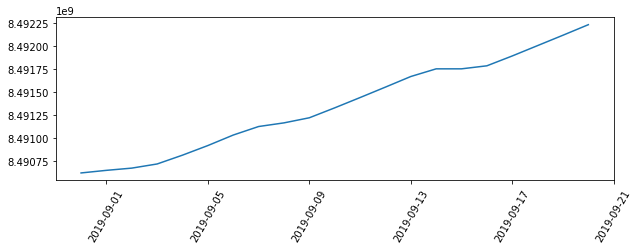

In [24]:
#plot the daily timeseries for a station including all turnstiles

xdates = station_by_date.loc['1 AV'].reset_index()['DateTime']
yentries = station_by_date.loc['1 AV']['ENTRIES']

plt.figure(figsize=(10,3))
plt.xticks(rotation=60)
plt.plot(xdates, yentries)

Was a bit skeptical with that last jump
I checked the differences between but I manually checked between the days and from the 17th to the 18th there was a jump of around 1million

Checking the 16th to the 17th there was a jump of about 37thousand

So it seems the plot is plausible